輸入立委臉書粉專內容及選舉政見資料

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

以台北市萬華區及中正區立委林昶佐為例，依照月份來統計數值資料的變化

In [69]:
freddy = fb[fb.page_name == "林昶佐 Freddy Lim"]#將林昶佐臉書資料叫出
freddy.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
2835,365320250345879_980769162134315,365320250345879,林昶佐 Freddy Lim,政治人物,國民黨說「貨賣得出去」、「九二共識發大財」，\n結果馬上有書籍被中資快遞審查，禁運到香港，中國不要打臉國民黨那麼快啦XD,NaN,link,https://www.facebook.com/365320250345879/posts/980769162134315/,2019-01-14T14:19:17+0000,2019-01-14T22:19:17,...,在台託運「敏感書」寄港不行？ 台灣順豐：不回應 | 蘋果日報,香港文化人梁文道日前在台北委託飯店請快遞寄往香港，但飯店引述台灣順豐指稱，其中3本涉及歷史和哲學的「敏感書」不能寄送。香港《蘋果》特約記者今...,1589,0,0,0,0,0,59,81


In [70]:
freddy['new_date'] = pd.to_datetime(freddy['created_time_taipei']).dt.date
freddy['month_year'] = pd.to_datetime(freddy['new_date']).dt.to_period('M')
freddy['post_hour'] = pd.to_datetime(freddy['created_time_taipei']).dt.hour #找出發文 '時間'(hour)

freddy.head(1)
#轉換時間格式

<ipython-input-70-68254441d221>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freddy['new_date'] = pd.to_datetime(freddy['created_time_taipei']).dt.date
<ipython-input-70-68254441d221>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freddy['month_year'] = pd.to_datetime(freddy['new_date']).dt.to_period('M')
<ipython-input-70-68254441d221>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
2835,365320250345879_980769162134315,365320250345879,林昶佐 Freddy Lim,政治人物,國民黨說「貨賣得出去」、「九二共識發大財」，\n結果馬上有書籍被中資快遞審查，禁運到香港，中國不要打臉國民黨那麼快啦XD,NaN,link,https://www.facebook.com/365320250345879/posts/980769162134315/,2019-01-14T14:19:17+0000,2019-01-14T22:19:17,...,0,0,0,0,0,59,81,2019-01-14,2019-01,22


In [71]:
results = freddy.groupby('month_year').sum()
results
#統計每個月份的讚數、留言、分享

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
month_year,,,,,,,,,,
2019-01,8402365757955217,25130,0,0,0,0,0,740,1043,356
2019-02,10594287260030496,32552,0,0,0,0,0,8991,1092,451
2019-03,9498326508992856,26363,0,0,0,0,0,885,630,371
2019-04,14612810013835176,46365,0,0,0,0,0,2164,1247,603
2019-05,22649855521444536,256966,0,0,0,0,0,9830,18066,970
2019-06,16074091015218696,190371,0,0,0,0,0,6073,9347,715
2019-07,14247489763489296,116542,0,0,0,0,0,4055,3394,585
2019-08,13516849262797536,330348,0,0,0,0,0,14649,12293,505
2019-09,14247489763489296,211021,0,0,0,0,0,6194,7335,593


In [72]:
results.index.name = 'newhead'
results.reset_index(inplace=True)
results
#回復原本的排列

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,8402365757955217,25130,0,0,0,0,0,740,1043,356
1,2019-02,10594287260030496,32552,0,0,0,0,0,8991,1092,451
2,2019-03,9498326508992856,26363,0,0,0,0,0,885,630,371
3,2019-04,14612810013835176,46365,0,0,0,0,0,2164,1247,603
4,2019-05,22649855521444536,256966,0,0,0,0,0,9830,18066,970
5,2019-06,16074091015218696,190371,0,0,0,0,0,6073,9347,715
6,2019-07,14247489763489296,116542,0,0,0,0,0,4055,3394,585
7,2019-08,13516849262797536,330348,0,0,0,0,0,14649,12293,505
8,2019-09,14247489763489296,211021,0,0,0,0,0,6194,7335,593
9,2019-10,12786208762105776,279750,0,0,0,0,0,6418,11825,552


可以看到，讚數最多月份的前三名為2019.12月、2019.8月、2020.1月，評論數最多的月份為2019.8月、2019.12月、2019.5月，而分享次數最多的月份為2019.12月、2019.5月、2019.8月。

以下將針對有重複的月份作分析，查看2019.5月、2019.8月、2019.12月這幾個月份的貼文有什麼值得研究的地方。

In [73]:
results['newhead'].map(str)#將newhead那欄中所有資料轉為字串格式

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
12    2020-01
Name: newhead, dtype: object

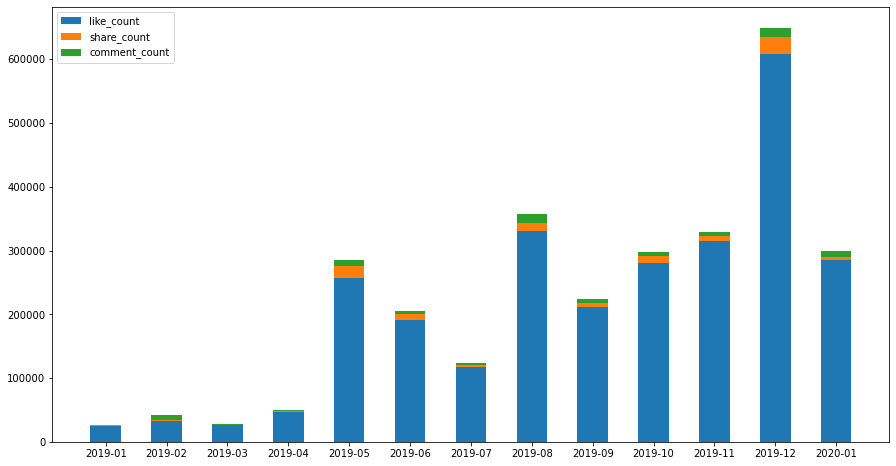

In [74]:
import matplotlib.pyplot as plt

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])

ax.legend()

plt.show()

第十屆立委於2020年1月11號舉行，可以看到選前一個月2019.12月的貼文讚數、分享與評論數都高，預測為選前在臉書上增加發文次數宣傳導致。除了選前外，次高的月份為2019.8月，第三高的則是2019.5月，這兩個月分將做為以下要分析的主要標的，尤其是2019.5月，因為在這之前，林昶佐的貼文互動數都不高，是甚麼原因造成貼文熱度突然攀升是可以繼續分析的部分。

In [75]:
August = freddy[freddy.month_year == "2019-08"]

In [76]:
results_august = August.groupby('new_date').sum()
results_august

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
new_date,,,,,,,,,,
2019-08-01,1095960751037637,110537,0,0,0,0,0,10928,7879,36
2019-08-02,730640500691758,27681,0,0,0,0,0,672,317,35
2019-08-04,365320250345879,13063,0,0,0,0,0,91,124,22
2019-08-05,365320250345879,6584,0,0,0,0,0,64,83,12
2019-08-06,730640500691758,9791,0,0,0,0,0,124,186,32
2019-08-07,365320250345879,7342,0,0,0,0,0,68,328,11
2019-08-08,730640500691758,11255,0,0,0,0,0,109,38,24
2019-08-09,730640500691758,10555,0,0,0,0,0,144,295,38
2019-08-11,365320250345879,7509,0,0,0,0,0,92,59,23


In [77]:
results_august.index.name = 'newhead'
results_august.reset_index(inplace=True)
results_august

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-08-01,1095960751037637,110537,0,0,0,0,0,10928,7879,36
1,2019-08-02,730640500691758,27681,0,0,0,0,0,672,317,35
2,2019-08-04,365320250345879,13063,0,0,0,0,0,91,124,22
3,2019-08-05,365320250345879,6584,0,0,0,0,0,64,83,12
4,2019-08-06,730640500691758,9791,0,0,0,0,0,124,186,32
5,2019-08-07,365320250345879,7342,0,0,0,0,0,68,328,11
6,2019-08-08,730640500691758,11255,0,0,0,0,0,109,38,24
7,2019-08-09,730640500691758,10555,0,0,0,0,0,144,295,38
8,2019-08-11,365320250345879,7509,0,0,0,0,0,92,59,23
9,2019-08-12,365320250345879,1579,0,0,0,0,0,16,8,11


No handles with labels found to put in legend.


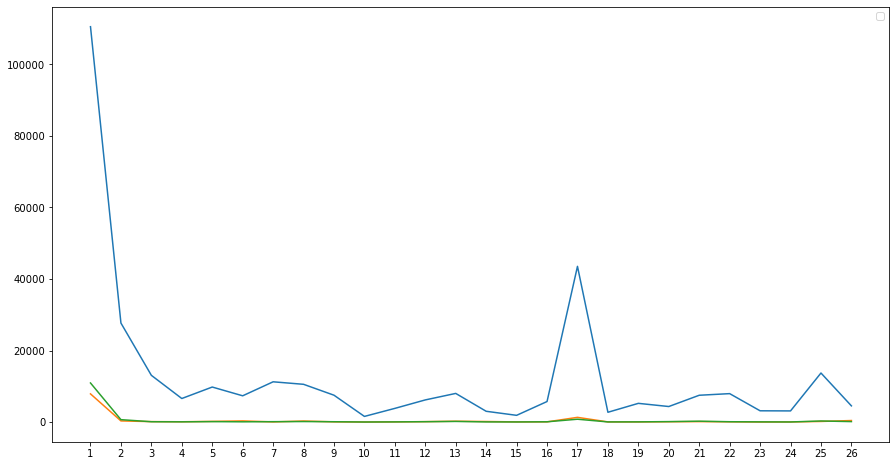

In [78]:
labels_august = [str(i) for i in range(1,27)]

fig_august, ax = plt.subplots()
fig_august.set_size_inches(15, 8)

ax.plot(labels_august, results_august['like_count'])
ax.plot(labels_august, results_august['share_count'])
ax.plot(labels_august, results_august['comment_count'])

ax.legend()

plt.show()

可以看到2019年8月1日的文章有非常高的熱度，在分析之前，必須確認一下七月份的數據資料，看看七月底的貼文熱度如何?是否與8/1的數據相關聯

In [79]:
July = freddy[freddy.month_year == "2019-07"]

In [80]:
results_july = July.groupby('new_date').sum()
results_july

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
new_date,,,,,,,,,,
2019-07-01,730640500691758,5742,0,0,0,0,0,131,109,42
2019-07-02,365320250345879,2773,0,0,0,0,0,42,27,16
2019-07-03,1095960751037637,19738,0,0,0,0,0,565,332,51
2019-07-04,730640500691758,5947,0,0,0,0,0,193,327,31
2019-07-05,365320250345879,1654,0,0,0,0,0,34,86,10
2019-07-06,365320250345879,1943,0,0,0,0,0,88,24,21
2019-07-07,365320250345879,1161,0,0,0,0,0,18,81,20
2019-07-08,365320250345879,1295,0,0,0,0,0,22,10,11
2019-07-09,365320250345879,4381,0,0,0,0,0,42,83,13


In [81]:
results_july.index.name = 'newhead'
results_july.reset_index(inplace=True)
results_july

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-07-01,730640500691758,5742,0,0,0,0,0,131,109,42
1,2019-07-02,365320250345879,2773,0,0,0,0,0,42,27,16
2,2019-07-03,1095960751037637,19738,0,0,0,0,0,565,332,51
3,2019-07-04,730640500691758,5947,0,0,0,0,0,193,327,31
4,2019-07-05,365320250345879,1654,0,0,0,0,0,34,86,10
5,2019-07-06,365320250345879,1943,0,0,0,0,0,88,24,21
6,2019-07-07,365320250345879,1161,0,0,0,0,0,18,81,20
7,2019-07-08,365320250345879,1295,0,0,0,0,0,22,10,11
8,2019-07-09,365320250345879,4381,0,0,0,0,0,42,83,13
9,2019-07-10,365320250345879,674,0,0,0,0,0,5,6,17


經查看，2019.7月底的貼文在讚數大多不超過10000，且貼文中的評論及分享次數都不高。因此可排除七月底與2019.8.1有其他的關聯。

In [82]:
freddy['new_date']=freddy['new_date'].map(str)
freddy[freddy['new_date'] == "2019-08-01"] 

<ipython-input-82-6e61f3262f08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freddy['new_date']=freddy['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
3110,365320250345879_1108344352710128,365320250345879,林昶佐 Freddy Lim,政治人物,【在關鍵時刻做出選擇】\n \n投身政治五年來的成果與困境，讓我連日思考，要守護我們自由的生活，並繼續推進美好的價值，怎麼做才是正確的選擇。\n \n \n在此，本人聲明： \n \n一、即刻退出時代力量，以無黨籍的身分投入 2020 中正萬華區的立委選戰。\n二、基於台灣的國家利益，總統候選人支持蔡英文連任。\n三、將著手促成包括中正萬華在內，台灣所有進步陣營的跨黨派協調共議。建立新模式推出每一選區的最強候選人，一對一來對抗國共勢力逆襲，促成團結抗中！\n \n \n從關心台灣的音樂工作者，到參與時代力量創黨、進入國會，我始終期許這股新血可以促成更細緻多元的政治討論，團結更多人來支持我們的理念價值，全力推動台灣成為一個有尊嚴且美好的正常國家。\n \n然而，這幾年來黨內在有些議題或法案的推動方式，由於政黨合作的戰略不明，實質上讓理想與價值更難推進。因此，我在時代力量內部數次提出路線問題的討論，可惜，至今幾年來仍未能達成共識。\n\n距離關鍵大選投票日僅剩五個月，我無法再膠著於黨內混沌的路線中，必須清楚地朝理想方向全力前行。面對現在艱困的情勢，我將與社會各界懷抱共同理想的夥伴們，一起開創更寬廣的可能，一起帶動台灣正面的力量。當然，我也期待，我的離開可以開啟時代力量改變的契機。\n \n此時此刻，我認為最重要的是：讓台灣在國際社會中航向正確的方向。面對中國對台灣的威脅與打壓，台灣人站在危崖邊緣，只能奮力一戰，退無可退。\n \n因此，基於台灣國家利益，支持不親中的候選人蔡英文總統連任，是毫無疑問的選擇。\n\n而在國會方面，國民黨主席吳敦義已經喊出要奪下86席國會席次，跨越修憲門檻，顯然要由韓國瑜來實現馬英九未完成的和平協議、終極統一。所以，這次立委選戰，每一個台灣人必須用盡每一分力來阻擋國共聯手逆襲。也唯有每一個立委選區都推出一對一的最強人選，才能達成這個目標。\n\n因此，我所屬的中正萬華席次，並非唯我不可，我將邀請民進黨、時代力量、基進黨、社民黨、綠黨等所有願意加入團結抗中的政黨，共同商議如何在此推出最強的候選人，組合最強的團隊及連線。並開始探訪各界優秀人士代表團結抗中陣營，投入目前尚未有候選人的艱困選區選舉。力促全台每一選區都派出最強戰將，一對一對決國民黨。\n\n2020，我們要確保航道，讓台灣航向一個美好的未來。所有的人都必須行動，為時未晚。這是我們這個時代的使命，在關鍵的時刻做出選擇，團結同行，2020，台灣勝利！\n\n【聲明直播影片】：https://www.facebook.com/limfreddy/videos/2537594019637320/,NaN,photo,https://www.facebook.com/365320250345879/posts/1108344352710128/,2019-08-01T05:43:51+0000,2019-08-01T13:43:51,...,0,0,0,0,0,6537,6944,2019-08-01,2019-08,13
3111,365320250345879_2537594019637320,365320250345879,林昶佐 Freddy Lim,政治人物,在關鍵時刻做出選擇,林昶佐 Freddy Lim 的直播影片。,video,https://www.facebook.com/limfreddy/videos/2537594019637320/,2019-08-01T04:43:57+0000,2019-08-01T12:43:57,...,0,0,0,0,0,4128,844,2019-08-01,2019-08,12
3112,365320250345879_1108272692717294,365320250345879,林昶佐 Freddy Lim,政治人物,【林昶佐國會辦公室 採訪通知】\n \n時代力量決策會議後，立法委員林昶佐將於本日(8/1)下午1點，進行重大發表。敬邀媒體朋友採訪。\n \n地點：立法院中興大樓一樓 濟南路一段3-1號,NaN,status,https://www.facebook.com/365320250345879/posts/1108272692717294/,2019-08-01T03:51:31+0000,2019-08-01T11:51:31,...,0,0,0,0,0,263,91,2019-08-01,2019-08,11


In [121]:
temp = freddy[freddy['new_date'] == "2019-08-01"]
temp[temp.like_count == max(temp.like_count)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
3110,365320250345879_1108344352710128,365320250345879,林昶佐 Freddy Lim,政治人物,【在關鍵時刻做出選擇】\n \n投身政治五年來的成果與困境，讓我連日思考，要守護我們自由的生活，並繼續推進美好的價值，怎麼做才是正確的選擇。\n \n \n在此，本人聲明： \n \n一、即刻退出時代力量，以無黨籍的身分投入 2020 中正萬華區的立委選戰。\n二、基於台灣的國家利益，總統候選人支持蔡英文連任。\n三、將著手促成包括中正萬華在內，台灣所有進步陣營的跨黨派協調共議。建立新模式推出每一選區的最強候選人，一對一來對抗國共勢力逆襲，促成團結抗中！\n \n \n從關心台灣的音樂工作者，到參與時代力量創黨、進入國會，我始終期許這股新血可以促成更細緻多元的政治討論，團結更多人來支持我們的理念價值，全力推動台灣成為一個有尊嚴且美好的正常國家。\n \n然而，這幾年來黨內在有些議題或法案的推動方式，由於政黨合作的戰略不明，實質上讓理想與價值更難推進。因此，我在時代力量內部數次提出路線問題的討論，可惜，至今幾年來仍未能達成共識。\n\n距離關鍵大選投票日僅剩五個月，我無法再膠著於黨內混沌的路線中，必須清楚地朝理想方向全力前行。面對現在艱困的情勢，我將與社會各界懷抱共同理想的夥伴們，一起開創更寬廣的可能，一起帶動台灣正面的力量。當然，我也期待，我的離開可以開啟時代力量改變的契機。\n \n此時此刻，我認為最重要的是：讓台灣在國際社會中航向正確的方向。面對中國對台灣的威脅與打壓，台灣人站在危崖邊緣，只能奮力一戰，退無可退。\n \n因此，基於台灣國家利益，支持不親中的候選人蔡英文總統連任，是毫無疑問的選擇。\n\n而在國會方面，國民黨主席吳敦義已經喊出要奪下86席國會席次，跨越修憲門檻，顯然要由韓國瑜來實現馬英九未完成的和平協議、終極統一。所以，這次立委選戰，每一個台灣人必須用盡每一分力來阻擋國共聯手逆襲。也唯有每一個立委選區都推出一對一的最強人選，才能達成這個目標。\n\n因此，我所屬的中正萬華席次，並非唯我不可，我將邀請民進黨、時代力量、基進黨、社民黨、綠黨等所有願意加入團結抗中的政黨，共同商議如何在此推出最強的候選人，組合最強的團隊及連線。並開始探訪各界優秀人士代表團結抗中陣營，投入目前尚未有候選人的艱困選區選舉。力促全台每一選區都派出最強戰將，一對一對決國民黨。\n\n2020，我們要確保航道，讓台灣航向一個美好的未來。所有的人都必須行動，為時未晚。這是我們這個時代的使命，在關鍵的時刻做出選擇，團結同行，2020，台灣勝利！\n\n【聲明直播影片】：https://www.facebook.com/limfreddy/videos/2537594019637320/,NaN,photo,https://www.facebook.com/365320250345879/posts/1108344352710128/,2019-08-01T05:43:51+0000,2019-08-01T13:43:51,...,0,0,0,0,0,6537,6944,2019-08-01,2019-08,13


In [122]:
pd.set_option('display.max_colwidth', None)
showlink = freddy[freddy.new_date == "2019-08-01"].permalink.to_string()
print(showlink)

3110    https://www.facebook.com/365320250345879/posts/1108344352710128/
3111         https://www.facebook.com/limfreddy/videos/2537594019637320/
3112    https://www.facebook.com/365320250345879/posts/1108272692717294/


經臉書連結的貼文確認，林昶佐於2019年8月1日宣布退出時代力量，消息一出，引起許多人關注。

而在8月的另外一個關注高峰是在8月19日，以下分析8月19日當日發生了什麼事情。

In [85]:
freddy[freddy['new_date'] == "2019-08-19"]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
3124,365320250345879_1120547494823147,365320250345879,林昶佐 Freddy Lim,政治人物,【韓國瑜，你幹嘛買武器？】\n\n美國總統川普剛批准F-16V戰機的對台軍售案。而主張跟中國簽訂和平協議的韓國瑜竟然發表聲明批評政府，卻又對美國表達感謝。\n\n韓國瑜不懂國際局勢，可能不知道，正是因為台灣這幾年不再延續國民黨馬英九時代的策略，不再凡事依賴中國、凡事受中國控制，才能建立國際間對台灣的信任，逐漸得到國際對台灣越來越大的支持力道，台美關係也達到高峰，美國才願意出售許多高度機敏的武器來支持台灣。\n\n而且，韓國瑜不是主張要與中國簽訂和平協議？那又幹嘛買武器呢？\n\n還是韓國瑜也知道，當年國民黨與共產黨簽訂和平協議之後，國民黨慘遭共產黨渡江消滅。西藏與中國簽訂和平協議後，就慘遭武力鎮壓。所以，韓國瑜也知道和平協議是謊言，任何跟中國簽訂的協議都是欺騙，唯有靠專業現代的國防才能保護台灣真正的和平？\n\n韓國瑜矛盾的內心到底在想什麼，我們不知道。可以確定的是，要守護我們自由的生活，捍衛台灣的存在，就絕對不會跟韓國瑜站在同一邊。,NaN,photo,https://www.facebook.com/365320250345879/posts/1120547494823147/,2019-08-19T09:23:47+0000,2019-08-19T17:23:47,...,0,0,0,0,0,631,1270,2019-08-19,2019-08,17
3125,365320250345879_1120434644834432,365320250345879,林昶佐 Freddy Lim,政治人物,【持續監督改善軍中性別平權！】\n\n中正預校日前傳出去年10月間，該校校長、教育長、政戰主任，餐會時常找女性主管作陪，致使假日需有人留守卻不在等情況，國防部徹查並將三長記申誡調職懲處。\n \n軍中性別平權問題一直是我在外交國防委員會關注的議題。軍方曾一度把性騷擾案件的統計資料設成國家機密文件，被我要求公開；另外，關於軍中性騷擾案件被不當處置等問題，我將繼續針對個案嚴格要求處理，並持續監督整體性別友善文化的檢討改善。,NaN,photo,https://www.facebook.com/365320250345879/posts/1120434644834432/,2019-08-19T04:30:07+0000,2019-08-19T12:30:07,...,0,0,0,0,0,26,14,2019-08-19,2019-08,12
3126,365320250345879_1120114111533152,365320250345879,林昶佐 Freddy Lim,政治人物,我戴黃捷的700度眼鏡跟她自拍，結果：\n\n「欸我戴妳眼鏡看不到銀幕，妳看一下o不ok...」\n「我沒戴眼鏡也看不到啦！」\n\n兩人陷入爆笑，只好還是請人幫拍了。\n\n這次北美巡迴演講，西岸場次有黃捷一起同行，感謝帶來無比的歡樂！\n\n黃捷 鳳山捷伴同行,NaN,photo,https://www.facebook.com/365320250345879/posts/1120114111533152/,2019-08-18T16:46:58+0000,2019-08-19T00:46:58,...,0,0,0,0,0,137,34,2019-08-19,2019-08,0


In [86]:
pd.set_option('display.max_colwidth', None)
showlink = freddy[freddy.new_date == "2019-08-19"].permalink.to_string()
print(showlink)

3124    https://www.facebook.com/365320250345879/posts/1120547494823147/
3125    https://www.facebook.com/365320250345879/posts/1120434644834432/
3126    https://www.facebook.com/365320250345879/posts/1120114111533152/


In [87]:
temp_2 = freddy[freddy['new_date'] == "2019-08-19"]
temp_2[temp_2.like_count == max(temp_2.like_count)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
3124,365320250345879_1120547494823147,365320250345879,林昶佐 Freddy Lim,政治人物,【韓國瑜，你幹嘛買武器？】\n\n美國總統川普剛批准F-16V戰機的對台軍售案。而主張跟中國簽訂和平協議的韓國瑜竟然發表聲明批評政府，卻又對美國表達感謝。\n\n韓國瑜不懂國際局勢，可能不知道，正是因為台灣這幾年不再延續國民黨馬英九時代的策略，不再凡事依賴中國、凡事受中國控制，才能建立國際間對台灣的信任，逐漸得到國際對台灣越來越大的支持力道，台美關係也達到高峰，美國才願意出售許多高度機敏的武器來支持台灣。\n\n而且，韓國瑜不是主張要與中國簽訂和平協議？那又幹嘛買武器呢？\n\n還是韓國瑜也知道，當年國民黨與共產黨簽訂和平協議之後，國民黨慘遭共產黨渡江消滅。西藏與中國簽訂和平協議後，就慘遭武力鎮壓。所以，韓國瑜也知道和平協議是謊言，任何跟中國簽訂的協議都是欺騙，唯有靠專業現代的國防才能保護台灣真正的和平？\n\n韓國瑜矛盾的內心到底在想什麼，我們不知道。可以確定的是，要守護我們自由的生活，捍衛台灣的存在，就絕對不會跟韓國瑜站在同一邊。,NaN,photo,https://www.facebook.com/365320250345879/posts/1120547494823147/,2019-08-19T09:23:47+0000,2019-08-19T17:23:47,...,0,0,0,0,0,631,1270,2019-08-19,2019-08,17


3124這筆資料為當天最多人關注的貼文，經連結查看，這篇貼文的標題為【韓國瑜，你幹嘛買武器？】，是針對2020總統大選的參選人韓國瑜所發出的言論，而林昶佐立委也在貼文中發表他的高論。

接著分析最為好奇的2019.5月，究竟是什麼原因讓原本活躍度不高的粉專，開始轉向認真的經營。

In [88]:
May = freddy[freddy.month_year == "2019-05"]

In [89]:
results_may = May.groupby('new_date').sum()
results_may

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
new_date,,,,,,,,,,
2019-05-01,365320250345879,3769,0,0,0,0,0,279,436,10
2019-05-02,730640500691758,3814,0,0,0,0,0,192,272,37
2019-05-03,1095960751037637,3856,0,0,0,0,0,91,65,47
2019-05-04,730640500691758,3709,0,0,0,0,0,148,46,26
2019-05-05,730640500691758,2665,0,0,0,0,0,62,123,28
2019-05-06,1461281001383516,5207,0,0,0,0,0,147,178,68
2019-05-07,730640500691758,2265,0,0,0,0,0,37,42,36
2019-05-08,730640500691758,2460,0,0,0,0,0,43,53,29
2019-05-09,1095960751037637,10373,0,0,0,0,0,321,1312,58


In [90]:
results_may.index.name = 'newhead'
results_may.reset_index(inplace=True)
results_may

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-05-01,365320250345879,3769,0,0,0,0,0,279,436,10
1,2019-05-02,730640500691758,3814,0,0,0,0,0,192,272,37
2,2019-05-03,1095960751037637,3856,0,0,0,0,0,91,65,47
3,2019-05-04,730640500691758,3709,0,0,0,0,0,148,46,26
4,2019-05-05,730640500691758,2665,0,0,0,0,0,62,123,28
5,2019-05-06,1461281001383516,5207,0,0,0,0,0,147,178,68
6,2019-05-07,730640500691758,2265,0,0,0,0,0,37,42,36
7,2019-05-08,730640500691758,2460,0,0,0,0,0,43,53,29
8,2019-05-09,1095960751037637,10373,0,0,0,0,0,321,1312,58
9,2019-05-10,365320250345879,692,0,0,0,0,0,8,11,15


No handles with labels found to put in legend.


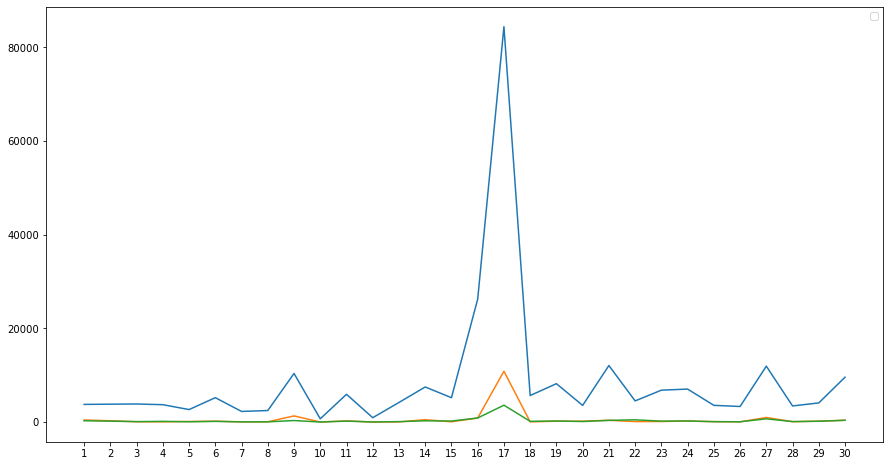

In [91]:
labels_m = [str(i) for i in range(1,31)]

fig_m, ax = plt.subplots()
fig_m.set_size_inches(15, 8)

ax.plot(labels_m, results_may['like_count'])
ax.plot(labels_m, results_may['share_count'])
ax.plot(labels_m, results_may['comment_count'])

ax.legend()

plt.show()

將資料視覺化後，可以看到5月17日的貼文互動十分熱絡

In [92]:
freddy[freddy['new_date'] == "2019-05-17"]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
3007,365320250345879_1055210414690189,365320250345879,林昶佐 Freddy Lim,政治人物,三讀通過，預祝大家新婚愉快！🏳️‍🌈\n \n院長、各位委員，還要場外所有的朋友們！還有更多沒辦法到場，在線上關注的大家，首先先恭喜大家，我們一起做到了！台灣成為亞洲第一個同性婚姻合法化的國家，這是令人驕傲的一刻！另外，身為立法委員，我也要向同志朋友們說一聲抱歉，讓大家受委屈了，讓大家久等了！\n \n這幾天，有許多朋友們來給我鼓勵和感謝。其實，是我要感謝大家，感謝大家一路以來的不放棄，感謝大家對於婚姻與家庭的嚮往，讓我這個已婚18年、兩歲小女孩的爸爸，還能夠抱持著跟各位一樣的憧憬，來為大家努力。我很榮幸，能夠參與這一刻。\n \n但是，我們不能忘記，過去有許多受到壓迫的朋友們，沒能等到這一刻。從祁家威先生花了三十年爭取所面對的困境，甚至從去年公投讓大家難過的結果，一直到今天！到剛剛！都還有許多委員的發言，仍然在壓迫、歧視同志朋友。婚姻平權這麼基本的權利與自由，一直到今天二讀三讀，卻仍是那麼的艱辛。\n \n \n但我要請所有的同志朋友，過了今天，請大家放心、開開心心的去結婚！\n \n \n身為區域立委，我跟很多的立委同事一樣面對壓力，甚至是各種抹黑扭曲的指控，但我請同志朋友們安心去結婚吧，和社會溝通、讓台灣不再有歧視，是我們立法委員的責任，同時也還有許多這次未能同時完成保障的事項，這都讓我們來繼續努力。我相信不久之後，包括反同的人也會發現他們的生活沒有受到任何傷害，甚至還能感受到社會充滿了更多幸福。\n \n \n最後，預祝大家新婚愉快！\n \n \n2019.05.17 林昶佐,NaN,photo,https://www.facebook.com/365320250345879/posts/1055210414690189/,2019-05-17T07:35:55+0000,2019-05-17T15:35:55,...,0,0,0,0,0,1531,727,2019-05-17,2019-05,15
3008,365320250345879_1055089671368930,365320250345879,林昶佐 Freddy Lim,政治人物,【把票投出來！】\n\n別人結婚，為什麼會讓社會對立？為什麼讓社會撕裂？就是因為你們這些扭曲公投、曲解公投、散佈錯誤資訊、惡毒資訊，不斷製造傷害的人！,NaN,video,https://www.facebook.com/365320250345879/posts/1055089671368930/,2019-05-17T04:22:34+0000,2019-05-17T12:22:34,...,0,0,0,0,0,2010,10110,2019-05-17,2019-05,12
3009,365320250345879_1054997748044789,365320250345879,林昶佐 Freddy Lim,政治人物,凌晨去黎明里跟出遊鄉親打招呼，再進立院簽到，再趕去中正區民防常訓，再回立院準備資料，再去錦德里處理一二十年拆不掉的榮民印刷廠廢墟案，現在正衝回立法院即將表決。\n\n區域立委日常，心情卻很不一樣，興奮又幸福。,NaN,photo,https://www.facebook.com/365320250345879/posts/1054997748044789/,2019-05-17T02:20:23+0000,2019-05-17T10:20:23,...,0,0,0,0,0,62,8,2019-05-17,2019-05,10


In [93]:
pd.set_option('display.max_colwidth', None)
showlink = freddy[freddy.new_date == "2019-05-17"].permalink.to_string()
print(showlink)

3007    https://www.facebook.com/365320250345879/posts/1055210414690189/
3008    https://www.facebook.com/365320250345879/posts/1055089671368930/
3009    https://www.facebook.com/365320250345879/posts/1054997748044789/


In [94]:
temp_3 = freddy[freddy['new_date'] == "2019-05-17"]
temp_3[temp_3.like_count == max(temp_3.like_count)]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
3008,365320250345879_1055089671368930,365320250345879,林昶佐 Freddy Lim,政治人物,【把票投出來！】\n\n別人結婚，為什麼會讓社會對立？為什麼讓社會撕裂？就是因為你們這些扭曲公投、曲解公投、散佈錯誤資訊、惡毒資訊，不斷製造傷害的人！,NaN,video,https://www.facebook.com/365320250345879/posts/1055089671368930/,2019-05-17T04:22:34+0000,2019-05-17T12:22:34,...,0,0,0,0,0,2010,10110,2019-05-17,2019-05,12


立法院院會在5月17日下午三讀通過《司法院釋字第748號解釋施行法》，賦予同志伴侶得以結婚的法律依據，林昶佐委員在其臉書上貼出三讀討論的發言影片，獲得大眾的關注。

2019-05-10的貼文為什麼是關注最少的?

In [95]:
freddy[freddy['new_date'] == "2019-05-10"]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
2965,365320250345879_1050209645190266,365320250345879,林昶佐 Freddy Lim,政治人物,【給孩子們一個安全幸福的台灣！】\n\n今天俗稱兒虐條款的刑法第286條修正案在立院三讀通過。\n \n關於虐童案件，政府有關部門除了加強宣導兒虐不是家內事，推廣113專線之外，立法院也開始著手修法。\n \n其實在2012年刑法第286條已修過一次，但七年來只有14個案件適用本條起訴，成效不彰。因此本屆立法院再次提出了修正案，主要重點包括擴大守護對象範圍到18歲，以及加重罰責等。\n \n雖然時代力量所主張針對父母、監護人或實際照顧者若虐童要加重刑責的部分沒有通過，但整體還是提高了對於台灣兒少的保護。期待除了法律以外，我們可以讓包括社區安全、托育環境、人本教育、身心發展、弱勢家庭協助…等環節都能努力提升，讓社會安全網更完善，攜手努力打造一個幸福美好的台灣！,NaN,photo,https://www.facebook.com/365320250345879/posts/1050209645190266/,2019-05-10T07:26:08+0000,2019-05-10T15:26:08,...,0,0,0,0,0,8,11,2019-05-10,2019-05,15


In [96]:
pd.set_option('display.max_colwidth', None)
showlink= freddy[freddy.new_date == "2019-05-10"].permalink.to_string()
print(showlink)

2965    https://www.facebook.com/365320250345879/posts/1050209645190266/


經連結查看，5月10日的貼文是有關於兒虐條款刑法第286條修正案在立院三讀通過的消息，與5月17日的貼文相比，兒虐條款的關注熱度遠遠低於同性伴侶的議題。

In [99]:
post_time = freddy[['post_id','post_hour']].groupby('post_hour').count()
post_time.index.name = 'post_hour'
post_time.reset_index(inplace = True)
post_time

,post_hour,post_id
0,0,10
1,4,1
2,5,1
3,7,1
4,8,8
5,9,11
6,10,31
7,11,53
8,12,41
9,13,33


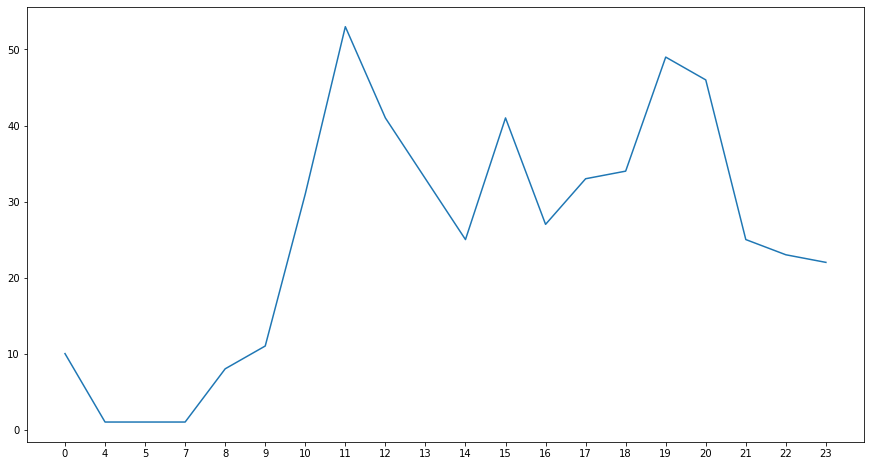

In [100]:
#畫出整年貼文分佈
labels = post_time['post_hour'].map(str)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, post_time['post_id'])

plt.show()

可以看到林昶佐最常發文的時間為中午11點~12點、15點~16點以及18-19點這些區間，為大家中午吃飯時間和下班時間

In [101]:
toplike_50 = freddy.sort_values(by = ['like_count'],ascending=False).head(50)
toplike_50.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year,post_hour
type,,,,,,,,,,,,,,,,,,,,,
link,2,2,2,2,2,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
photo,34,34,34,34,34,1,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
status,1,1,1,1,1,0,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
video,13,13,13,13,13,1,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13


在前五十受歡迎的貼文中，有34篇是有加上照片的，另外有13篇是有附影片的，可見林昶佐的粉絲喜歡視覺化的貼文

In [119]:
like_top10 = freddy.sort_values('like_count',ascending=False).head(10)
like_top10 = like_top10[['post_id','message','like_count','type','new_date']]
like_top10 = like_top10.replace(r'\n',' ',regex=True) # message text preprocessing
like_top10#前十個按讚數最高的貼文

,post_id,message,like_count,type,new_date
3110,365320250345879_1108344352710128,【在關鍵時刻做出選擇】 投身政治五年來的成果與困境，讓我連日思考，要守護我們自由的生活，並繼續推進美好的價值，怎麼做才是正確的選擇。 在此，本人聲明： 一、即刻退出時代力量，以無黨籍的身分投入 2020 中正萬華區的立委選戰。 二、基於台灣的國家利益，總統候選人支持蔡英文連任。 三、將著手促成包括中正萬華在內，台灣所有進步陣營的跨黨派協調共議。建立新模式推出每一選區的最強候選人，一對一來對抗國共勢力逆襲，促成團結抗中！ 從關心台灣的音樂工作者，到參與時代力量創黨、進入國會，我始終期許這股新血可以促成更細緻多元的政治討論，團結更多人來支持我們的理念價值，全力推動台灣成為一個有尊嚴且美好的正常國家。 然而，這幾年來黨內在有些議題或法案的推動方式，由於政黨合作的戰略不明，實質上讓理想與價值更難推進。因此，我在時代力量內部數次提出路線問題的討論，可惜，至今幾年來仍未能達成共識。 距離關鍵大選投票日僅剩五個月，我無法再膠著於黨內混沌的路線中，必須清楚地朝理想方向全力前行。面對現在艱困的情勢，我將與社會各界懷抱共同理想的夥伴們，一起開創更寬廣的可能，一起帶動台灣正面的力量。當然，我也期待，我的離開可以開啟時代力量改變的契機。 此時此刻，我認為最重要的是：讓台灣在國際社會中航向正確的方向。面對中國對台灣的威脅與打壓，台灣人站在危崖邊緣，只能奮力一戰，退無可退。 因此，基於台灣國家利益，支持不親中的候選人蔡英文總統連任，是毫無疑問的選擇。 而在國會方面，國民黨主席吳敦義已經喊出要奪下86席國會席次，跨越修憲門檻，顯然要由韓國瑜來實現馬英九未完成的和平協議、終極統一。所以，這次立委選戰，每一個台灣人必須用盡每一分力來阻擋國共聯手逆襲。也唯有每一個立委選區都推出一對一的最強人選，才能達成這個目標。 因此，我所屬的中正萬華席次，並非唯我不可，我將邀請民進黨、時代力量、基進黨、社民黨、綠黨等所有願意加入團結抗中的政黨，共同商議如何在此推出最強的候選人，組合最強的團隊及連線。並開始探訪各界優秀人士代表團結抗中陣營，投入目前尚未有候選人的艱困選區選舉。力促全台每一選區都派出最強戰將，一對一對決國民黨。 2020，我們要確保航道，讓台灣航向一個美好的未來。所有的人都必須行動，為時未晚。這是我們這個時代的使命，在關鍵的時刻做出選擇，團結同行，2020，台灣勝利！ 【聲明直播影片】：https://www.facebook.com/limfreddy/videos/2537594019637320/,91849,photo,2019-08-01
3223,365320250345879_1178780635666499,▍英昶開飯 小英總統來加蚋仔吃滷肉飯，還⋯⋯,60588,video,2019-10-30
3261,365320250345879_1212716395606256,「米魯，這是阿爸的心聲⋯⋯」,58313,video,2019-12-05
3345,365320250345879_1237001066511122,「起造一個美好有尊嚴的共和！」 1/11 迎向台灣大凱旋 ！ 出來投票！回家投票！ ＝前線大凱旋 台灣大凱旋＝ ⓶ 壯闊台灣 吳怡農 / 台北中山北松山 ⓺ 賴品妤 / 新北汐金萬瑞平雙貢 ⓶ 3Q 陳柏惟 / 台中峰鹿大烏龍 ⓷ 洪慈庸 / 台中潭雅神后 ⓺ 林昶佐 Freddy Lim / 台北中正萬華 ＝別忘記還有＝ ⓺ 余天 Yu Tian / 新北三重 ＝總統＝ ⓷ 蔡英文 Tsai Ing-wen,44292,video,2019-12-29
3008,365320250345879_1055089671368930,【把票投出來！】 別人結婚，為什麼會讓社會對立？為什麼讓社會撕裂？就是因為你們這些扭曲公投、曲解公投、散佈錯誤資訊、惡毒資訊，不斷製造傷害的人！,42713,video,2019-05-17
3007,365320250345879_1055210414690189,三讀通過，預祝大家新婚愉快！🏳️‍🌈 院長、各位委員，還要場外所有的朋友們！還有更多沒辦法到場，在線上關注的大家，首先先恭喜大家，我們一起做到了！台灣成為亞洲第一個同性婚姻合法化的國家，這是令人驕傲的一刻！另外，身為立法委員，我也要向同志朋友們說一聲抱歉，讓大家受委屈了，讓大家久等了！ 這幾天，有許多朋友們來給我鼓勵和感謝。其實，是我要感謝大家，感謝大家一路以來的不放棄，感謝大家對於婚姻與家庭的嚮往，讓我這個已婚18年、兩歲小女孩的爸爸，還能夠抱持著跟各位一樣的憧憬，來為大家努力。我很榮幸，能夠參與這一刻。 但是，我們不能忘記，過去有許多受到壓迫的朋友們，沒能等到這一刻。從祁家威先生花了三十年爭取所面對的困境，甚至從去年公投讓大家難過的結果，一直到今天！到剛剛！都還有許多委員的發言，仍然在壓迫、歧視同志朋友。婚姻平權這麼基本的權利與自由，一直到今天二讀三讀，卻仍是那麼的艱辛。 但我要請所有的同志朋友，過了今天，請大家放心、開開心心的去結婚！ 身為區域立委，我跟很多的立委同事一樣面對壓力，甚至是各種抹黑扭曲的指控，但我請同志朋友們安心去結婚吧，和社會溝通、讓台灣不再有歧視，是我們立法委員的責任，同時也還有許多這次未能同時完成保障的事項，這都讓我們來繼續努力。我相信不久之後，包括反同的人也會發現他們的生活沒有受到任何傷害，甚至還能感受到社會充滿了更多幸福。 最後，預祝大家新婚愉快！ 2019.05.17 林昶佐,38153,photo,2019-05-17
3291,365320250345879_1228871717324057,五萬人大爆發！林昶佐大集氣！ 一月十一日，中正萬華大凱旋！ 前線大凱旋，台灣大凱旋！ 不要忘記，一人拉5票，拉10票，拉50票！！ ⓷ 蔡英文 Tsai Ing-wen ⓷ 洪慈庸 ⓶ 壯闊台灣 吳怡農 ⓶ 3Q 陳柏惟 ⓺ 賴品妤 ⓺ 林昶佐 Freddy Lim ⓺ 余天 Yu Tian,37945,photo,2019-12-21
3308,365320250345879_1249675158577046,有朋友問我為什麼今天在台上臉看起來很拘謹、嚴肅，甚至有朋友說我臉有點臭。我想，另一個朋友傳來的這兩張照片，可以稍微解釋一下狀況。 今晚總統講到史明歐吉桑那段時，我淚崩了，大家看到的臉就是我之後都在深呼吸，硬撐，忍淚。 今年中我做了重大的決定，成為了無黨，當時也是史明歐吉桑開始住院越來越不行的時候。他知道台灣局勢很辛苦，我仍然決定要拼連任，他講話已經很難讓人聽懂，還是用力的請敏紅姊拿錢捐給我。 我跟歐吉桑婉拒，說沒關係我會自己努力，我需要的是歐吉桑你一定要好起來，看到我成功連任！看到台灣局勢扭轉！ 然而，歐吉桑終究沒能活著陪我們經歷台灣去年後半年的發展，直到今晚盛大的場面，以及我相信即將迎接的大凱旋。所以，總統講到歐吉桑的時候，我淚崩了。 但我相信，歐吉桑仍然跟我們在一起，他有看到。,35175,photo,2020-01-10
3280,365320250345879_1233867403491155,▶五萬人擠爆凱道 昶佐台灣大凱旋◀ ＝前線大凱旋 台灣大凱旋＝ ⓶ 壯闊台灣 吳怡農 / 台北中山北松山 ⓺ 賴品妤 / 新北汐金萬瑞平雙貢寮 ⓶ 3Q 陳柏惟 / 台中峰鹿大烏龍 ⓷ 洪慈庸 / 台中潭雅神后 ⓺ 林昶佐 Freddy Lim / 台北中正萬華 ＝別忘記還有＝ ⓺ 余天 Yu Tian / 新北三重,33193,video,2019-12-26
3124,365320250345879_1120547494823147,【韓國瑜，你幹嘛買武器？】 美國總統川普剛批准F-16V戰機的對台軍售案。而主張跟中國簽訂和平協議的韓國瑜竟然發表聲明批評政府，卻又對美國表達感謝。 韓國瑜不懂國際局勢，可能不知道，正是因為台灣這幾年不再延續國民黨馬英九時代的策略，不再凡事依賴中國、凡事受中國控制，才能建立國際間對台灣的信任，逐漸得到國際對台灣越來越大的支持力道，台美關係也達到高峰，美國才願意出售許多高度機敏的武器來支持台灣。 而且，韓國瑜不是主張要與中國簽訂和平協議？那又幹嘛買武器呢？ 還是韓國瑜也知道，當年國民黨與共產黨簽訂和平協議之後，國民黨慘遭共產黨渡江消滅。西藏與中國簽訂和平協議後，就慘遭武力鎮壓。所以，韓國瑜也知道和平協議是謊言，任何跟中國簽訂的協議都是欺騙，唯有靠專業現代的國防才能保護台灣真正的和平？ 韓國瑜矛盾的內心到底在想什麼，我們不知道。可以確定的是，要守護我們自由的生活，捍衛台灣的存在，就絕對不會跟韓國瑜站在同一邊。,28465,photo,2019-08-19


In [120]:
showlink= freddy[freddy.new_date == "2019-10-30"].permalink.to_string()
print(showlink)#讚數第二高貼文連結

3223    https://www.facebook.com/365320250345879/posts/1178780635666499/


In [117]:
showlink= freddy[freddy.new_date == "2019-12-05"].permalink.to_string()
print(showlink)#按讚數第三高貼文連結-3261

3261    https://www.facebook.com/365320250345879/posts/1212716395606256/
3262    https://www.facebook.com/365320250345879/posts/1212608668950362/


在貼文中，林昶佐前十篇的貼文，大多是選舉的貼文以及發表一些政論的貼文，而第一高的貼文則是林昶佐退黨的聲明，第二高的為蔡英文總統到林昶佐的選區品嘗小吃的影片，第三高的為林昶佐對她女兒的告白，而其他的貼文則是有關同婚、史明去世、軍售的議題。

In [103]:
lastlike_10 = freddy.sort_values(by = ['like_count'],ascending = True).head(10)
lastlike_10[['message','like_count','month_year','type','new_date']].replace(r'\n',' ',regex=True)

,message,like_count,month_year,type,new_date
3290,台灣大凱旋 現場Live🤘 最強動員，迎接凱旋 🔸閃靈完整表演只有現場看得到，沒有全程直播！ 🔸請排除萬難到現場，感受最強震撼！ 🎙金曲唱將：閃靈 ft.大型交響樂團+何欣穗+余天+滅火器+GIGO ⚔️登場戰將：蔡英文、林昶佐、吳怡農、陳柏惟、洪慈庸、賴品妤,0,2019-12,status,2019-12-21
3289,台灣大凱旋 現場Live🤘 最強動員，迎接凱旋 🔸閃靈完整表演只有現場看得到，沒有全程直播！ 🔸請排除萬難到現場，感受最強震撼！ 🎙金曲唱將：閃靈 ft.大型交響樂團+何欣穗+余天+滅火器+GIGO ⚔️登場戰將：蔡英文、林昶佐、吳怡農、陳柏惟、洪慈庸、賴品妤,0,2019-12,status,2019-12-22
3081,NaN,0,2019-07,status,2019-07-25
2959,昶佐 x 黃捷 鳳山捷伴同行 直播開催！🎬 哇開始直播了，會不會收到馬車和跑車呢！（好像沒這功能？）第一次跟黃捷上益智節目好緊張，答錯或答不出來還請黃捷不要翻我白眼了🙏,127,2019-05,video,2019-05-12
2972,【終於解禁！暴雷來襲！】 今天來上FHM Taiwan 男人幫國際中文版直播，發表再次獲得公督盟評鑑為優秀立委的得獎感言。ㄜ，不是，是要爆雷啦！ 聊聊自己跟美漫的淵源，以及追MCU十年的心得，是羅素兄弟說上映兩週後就可以說了，大家不要怪我喔～ #復仇者聯盟4 #Marvel,163,2019-05,video,2019-05-07
2929,兒童節連假，來我們 2019城南有意思！ 雖然米魯還不知道什麼是兒童節，不過每到連假總是想盡辦法在跑我們我們中正萬華的行程時，也要擠出一些空檔帶米魯出來走走。好險連續兩年，文總都在我們在地城南串聯店家和鄰里社區，在兒童節假期舉辦「城南有意思」，親子友善、好玩又好逛，我跟米魯都很愛，一定要推薦給大家！ ► 城南有意思：https://www.facebook.com/events/554390015059714/,178,2019-04,photo,2019-04-02
2880,在春節後到立法院委員會正式開會之前，除了跑鄰里元宵活動以外，每天就是會勘、辦理協調會，為大家解決問題。有幾個歷經十幾年未能解決的老問題，最近也一一有了新進展，之後再來彙整跟大家報告囉！,199,2019-02,photo,2019-02-20
2842,今早到我們萬華禮天宮發放冬令救濟物品。每年舊曆年終，在地除了社區行程與尾牙餐會以外，也有許多慈善救濟活動，讓每個角落都充滿溫暖。我們林昶佐國會團隊也繼續為大家的生活更美好而努力！,216,2019-01,photo,2019-01-07
2889,台電應彌補單獨過戶漏洞 避免民眾遭詐騙 今年初，我們萬華頂碩里多戶民眾遭人竄改電籍過戶。經過調查，我們發現早在數年前就已有多起這種案件，有心人士利用台電「單獨過戶」便民措施的漏洞來對長輩勒索，甚至把長輩的自用住宅當成詐騙目標。過了幾年，這個問題居然還存在，這種詐騙手法仍到處流竄。 「單獨過戶」，原本是為了方便少部分無法聯繫原屋主的居住者，便民的措施卻成為有心人士的詐騙工具。我在年初召開協調會，要求台電具體檢討「單獨過戶」的流程，並修正用電契約來彌補這個漏洞。今天我們也與在地民眾以及台電共同召開記者會，向社會大眾說明，並提醒民眾應主動確認有無遭到變更，家中長輩有沒有被不明人士接觸。 關於「單獨過戶」的流程，台電將做以下改善，包括：單獨過戶後將通知原用戶，並以系統控管單獨過戶的用戶。若過戶不實，過戶者應負擔法律責任及賠償。同時，用電契約也將作修正，遭有心人士不實過戶時，台電得提供用電申請資料予原用戶做追查及後續報案之用。,218,2019-03,photo,2019-03-13
2855,又到了每年歲末時刻，感謝會計師公會再次來到我們萬華舉行「寒冬送暖」愛心贈米活動。 這次公會透過林昶佐國會團隊、劉耀仁議員團隊、萬華二十里的里長、濟南基督長老教會、人安基金會、恩友中心一起合作，將物資送給需要的家庭。 祝福大家能平安過好年，我們也會繼續在崗位上為大家的幸福生活繼續打拚！,227,2019-01,photo,2019-01-21


可以從貼文中看到，按讚數最少的貼文大部分為選民服務，可以推測林昶佐的粉絲裡面，有非常大部分的粉絲並不是選區中的選民，因此對選民服務的貼文不感興趣

In [106]:
comment_top20 = freddy.sort_values('comment_count',ascending=False).head(10)
comment_top20 = comment_top20[['message','comment_count','type','new_date']]
comment_top20 = comment_top20.replace(r'\n',' ',regex=True) # message text preprocessing
comment_top20

,message,comment_count,type,new_date
2873,週日晚上來找小黑處理代誌變成來還願,8063,video,2019-02-24
3110,【在關鍵時刻做出選擇】 投身政治五年來的成果與困境，讓我連日思考，要守護我們自由的生活，並繼續推進美好的價值，怎麼做才是正確的選擇。 在此，本人聲明： 一、即刻退出時代力量，以無黨籍的身分投入 2020 中正萬華區的立委選戰。 二、基於台灣的國家利益，總統候選人支持蔡英文連任。 三、將著手促成包括中正萬華在內，台灣所有進步陣營的跨黨派協調共議。建立新模式推出每一選區的最強候選人，一對一來對抗國共勢力逆襲，促成團結抗中！ 從關心台灣的音樂工作者，到參與時代力量創黨、進入國會，我始終期許這股新血可以促成更細緻多元的政治討論，團結更多人來支持我們的理念價值，全力推動台灣成為一個有尊嚴且美好的正常國家。 然而，這幾年來黨內在有些議題或法案的推動方式，由於政黨合作的戰略不明，實質上讓理想與價值更難推進。因此，我在時代力量內部數次提出路線問題的討論，可惜，至今幾年來仍未能達成共識。 距離關鍵大選投票日僅剩五個月，我無法再膠著於黨內混沌的路線中，必須清楚地朝理想方向全力前行。面對現在艱困的情勢，我將與社會各界懷抱共同理想的夥伴們，一起開創更寬廣的可能，一起帶動台灣正面的力量。當然，我也期待，我的離開可以開啟時代力量改變的契機。 此時此刻，我認為最重要的是：讓台灣在國際社會中航向正確的方向。面對中國對台灣的威脅與打壓，台灣人站在危崖邊緣，只能奮力一戰，退無可退。 因此，基於台灣國家利益，支持不親中的候選人蔡英文總統連任，是毫無疑問的選擇。 而在國會方面，國民黨主席吳敦義已經喊出要奪下86席國會席次，跨越修憲門檻，顯然要由韓國瑜來實現馬英九未完成的和平協議、終極統一。所以，這次立委選戰，每一個台灣人必須用盡每一分力來阻擋國共聯手逆襲。也唯有每一個立委選區都推出一對一的最強人選，才能達成這個目標。 因此，我所屬的中正萬華席次，並非唯我不可，我將邀請民進黨、時代力量、基進黨、社民黨、綠黨等所有願意加入團結抗中的政黨，共同商議如何在此推出最強的候選人，組合最強的團隊及連線。並開始探訪各界優秀人士代表團結抗中陣營，投入目前尚未有候選人的艱困選區選舉。力促全台每一選區都派出最強戰將，一對一對決國民黨。 2020，我們要確保航道，讓台灣航向一個美好的未來。所有的人都必須行動，為時未晚。這是我們這個時代的使命，在關鍵的時刻做出選擇，團結同行，2020，台灣勝利！ 【聲明直播影片】：https://www.facebook.com/limfreddy/videos/2537594019637320/,6537,photo,2019-08-01
3111,在關鍵時刻做出選擇,4128,video,2019-08-01
3008,【把票投出來！】 別人結婚，為什麼會讓社會對立？為什麼讓社會撕裂？就是因為你們這些扭曲公投、曲解公投、散佈錯誤資訊、惡毒資訊，不斷製造傷害的人！,2010,video,2019-05-17
3313,▍中正萬華・團結之夜 龍山寺大爆場，林昶佐大凱旋！,1902,video,2020-01-09
3261,「米魯，這是阿爸的心聲⋯⋯」,1833,video,2019-12-05
3223,▍英昶開飯 小英總統來加蚋仔吃滷肉飯，還⋯⋯,1761,video,2019-10-30
3007,三讀通過，預祝大家新婚愉快！🏳️‍🌈 院長、各位委員，還要場外所有的朋友們！還有更多沒辦法到場，在線上關注的大家，首先先恭喜大家，我們一起做到了！台灣成為亞洲第一個同性婚姻合法化的國家，這是令人驕傲的一刻！另外，身為立法委員，我也要向同志朋友們說一聲抱歉，讓大家受委屈了，讓大家久等了！ 這幾天，有許多朋友們來給我鼓勵和感謝。其實，是我要感謝大家，感謝大家一路以來的不放棄，感謝大家對於婚姻與家庭的嚮往，讓我這個已婚18年、兩歲小女孩的爸爸，還能夠抱持著跟各位一樣的憧憬，來為大家努力。我很榮幸，能夠參與這一刻。 但是，我們不能忘記，過去有許多受到壓迫的朋友們，沒能等到這一刻。從祁家威先生花了三十年爭取所面對的困境，甚至從去年公投讓大家難過的結果，一直到今天！到剛剛！都還有許多委員的發言，仍然在壓迫、歧視同志朋友。婚姻平權這麼基本的權利與自由，一直到今天二讀三讀，卻仍是那麼的艱辛。 但我要請所有的同志朋友，過了今天，請大家放心、開開心心的去結婚！ 身為區域立委，我跟很多的立委同事一樣面對壓力，甚至是各種抹黑扭曲的指控，但我請同志朋友們安心去結婚吧，和社會溝通、讓台灣不再有歧視，是我們立法委員的責任，同時也還有許多這次未能同時完成保障的事項，這都讓我們來繼續努力。我相信不久之後，包括反同的人也會發現他們的生活沒有受到任何傷害，甚至還能感受到社會充滿了更多幸福。 最後，預祝大家新婚愉快！ 2019.05.17 林昶佐,1531,photo,2019-05-17
3055,「台港反送中，國民黨偏要送中！」 面對中國，香港被打得頭破血流，台灣被滲透得無孔不入，國民黨則由副主席曾永權帶大批人馬去中國參加「海峽論壇」，聽中國政協主席汪洋訓示「兩岸必須必然統一」。曾永權致詞時，把中國壓迫台灣講成是「台灣政府惡意挑動兩岸敏感神經」，what the?????? 還進一步建議中國政府廣設公/檢/法系統的「涉台專門平台」，是想搞台版的《送中條例》就對了？,1019,photo,2019-06-16
3280,▶五萬人擠爆凱道 昶佐台灣大凱旋◀ ＝前線大凱旋 台灣大凱旋＝ ⓶ 壯闊台灣 吳怡農 / 台北中山北松山 ⓺ 賴品妤 / 新北汐金萬瑞平雙貢寮 ⓶ 3Q 陳柏惟 / 台中峰鹿大烏龍 ⓷ 洪慈庸 / 台中潭雅神后 ⓺ 林昶佐 Freddy Lim / 台北中正萬華 ＝別忘記還有＝ ⓺ 余天 Yu Tian / 新北三重,993,video,2019-12-26


In [107]:
showlink= freddy[freddy.new_date == "2019-02-24"].permalink.to_string()
print(showlink)#留言最最多的貼文-2873

2872    https://www.facebook.com/365320250345879/posts/1005466766331221/
2873          https://www.facebook.com/limfreddy/videos/347440029207608/
2874    https://www.facebook.com/365320250345879/posts/1005165656361332/


經連結查看，最多人留言的是林昶佐完還願的實況，與粉絲的互動性高

In [114]:
#留言次數最少的貼文 
lesscomment_10 = freddy.sort_values(by = ['comment_count'],ascending = True).head(10)
lesscomment_10[['message','comment_count','month_year','new_date','post_hour']].replace(r'\n',' ',regex=True)

,message,comment_count,month_year,new_date,post_hour
3290,台灣大凱旋 現場Live🤘 最強動員，迎接凱旋 🔸閃靈完整表演只有現場看得到，沒有全程直播！ 🔸請排除萬難到現場，感受最強震撼！ 🎙金曲唱將：閃靈 ft.大型交響樂團+何欣穗+余天+滅火器+GIGO ⚔️登場戰將：蔡英文、林昶佐、吳怡農、陳柏惟、洪慈庸、賴品妤,0,2019-12,2019-12-21,23
3289,台灣大凱旋 現場Live🤘 最強動員，迎接凱旋 🔸閃靈完整表演只有現場看得到，沒有全程直播！ 🔸請排除萬難到現場，感受最強震撼！ 🎙金曲唱將：閃靈 ft.大型交響樂團+何欣穗+余天+滅火器+GIGO ⚔️登場戰將：蔡英文、林昶佐、吳怡農、陳柏惟、洪慈庸、賴品妤,0,2019-12,2019-12-22,0
3081,NaN,0,2019-07,2019-07-25,22
2972,【終於解禁！暴雷來襲！】 今天來上FHM Taiwan 男人幫國際中文版直播，發表再次獲得公督盟評鑑為優秀立委的得獎感言。ㄜ，不是，是要爆雷啦！ 聊聊自己跟美漫的淵源，以及追MCU十年的心得，是羅素兄弟說上映兩週後就可以說了，大家不要怪我喔～ #復仇者聯盟4 #Marvel,1,2019-05,2019-05-07,17
3198,好朋友 Tizzy Bac 主唱惠婷來華山文化園區，我身為在地立委一定要來好好的恭迎！我們中正區的鄉親們，快來華山參加他Tizzy Bac跟台虎啤酒合辦的活動，就到今晚八點喔！！,1,2019-10,2019-10-20,13
2929,兒童節連假，來我們 2019城南有意思！ 雖然米魯還不知道什麼是兒童節，不過每到連假總是想盡辦法在跑我們我們中正萬華的行程時，也要擠出一些空檔帶米魯出來走走。好險連續兩年，文總都在我們在地城南串聯店家和鄰里社區，在兒童節假期舉辦「城南有意思」，親子友善、好玩又好逛，我跟米魯都很愛，一定要推薦給大家！ ► 城南有意思：https://www.facebook.com/events/554390015059714/,1,2019-04,2019-04-02,18
2974,【打造結合在地的新空間：廣一廣二公園】 我們萬華車站旁的廣ㄧ廣二地下停車場在今年即將完工，緊接著地面景觀公園將開始施工。我與市議員 劉耀仁、富福里許里長與周邊的商圈與社區代表，邀請台鐵及台北市相關部門及施工單位召開說明會。 商圈及在地居民陸續提出包括夜間照明、停車問題等，皆已獲得相關單位納入施工補強的項目。而大家所關心的，完工後的交通動線、以及結合周邊商圈觀光及文化的行銷策略，我與劉議員、許里長將會繼續合作，為大家持續督促相關部門配合，讓廣一廣二景觀公園成為帶動在地經濟的新焦點。,2,2019-05,2019-05-06,20
2887,直播中！拿到邀請卡的大家都來了嗎？ 沒搶到的，快鎖定國會頻道，今晚大院開唱，等等見！,2,2019-02,2019-02-15,18
2960,約起來！時力志工會報名受付中🤗 下週日(5/19)就是時代力量台北市本部志工會，歡迎來坐喔～當天會有我和我們的帥哥美女新科議員們跟大家聊聊，歡迎來當面交流、交朋友或加入志工，一起來打拼！ 本次活動採預約報名制，還沒報名的趕快點進傳送門約約喔！ 傳送門：https://bre.is/IofAexvme 台北市黨部志工會－活動資訊 時間：5/19(日) 下午一點入場 一點半開始 地點：大稻埕小藝埕三樓 - 思劇場 地址：台北市迪化街一段32巷1號 報名網址：https://bre.is/IofAexvme 台北市黨部電話：02-2732-2733 林昶佐 Freddy Lim 林穎孟 迎夢台北大安文山 黃郁芬 士林北投加分 蕭新晟 港湖科技人 吳崢在松山信義,3,2019-05,2019-05-12,18
2914,今天是我們在地一年一度的加蚋文化節，雖然邀請了我們這些民意代表上台按一個奇怪的魔球來當儀式，但最精彩的還是所有周邊鄰里社區推出的輪番超精彩演出，而且要恭喜孝德里榮獲今年挽豆芽大賽冠軍！ 內行的就知道，文化節就是預告4月16日（二）我們加蚋維持近百年的傳統－保儀大夫祈福遶境，後天上午11時從萬大路531號(台北漁產公司)啟程！,3,2019-04,2019-04-15,0


In [113]:
showlink= freddy[freddy.new_date == "2019-12-21"].permalink.to_string()
print(showlink)#留言最少的貼文-3290

3290    https://www.facebook.com/365320250345879/posts/1228914003986495/
3291    https://www.facebook.com/365320250345879/posts/1228871717324057/
3293    https://www.facebook.com/365320250345879/posts/1228526020691960/


經連結查看，按讚數最少是3290這條，為近況的更新，而且發布時間在深夜，因此較少人按讚

In [116]:
share_top10 = freddy.sort_values('share_count',ascending=False).head(10)
share_top10 = share_top10[['message','share_count','type','new_date','post_hour']]
share_top10 = share_top10.replace(r'\n',' ',regex=True) # message text preprocessing
share_top10

,message,share_count,type,new_date,post_hour
3008,【把票投出來！】 別人結婚，為什麼會讓社會對立？為什麼讓社會撕裂？就是因為你們這些扭曲公投、曲解公投、散佈錯誤資訊、惡毒資訊，不斷製造傷害的人！,10110,video,2019-05-17,12
3110,【在關鍵時刻做出選擇】 投身政治五年來的成果與困境，讓我連日思考，要守護我們自由的生活，並繼續推進美好的價值，怎麼做才是正確的選擇。 在此，本人聲明： 一、即刻退出時代力量，以無黨籍的身分投入 2020 中正萬華區的立委選戰。 二、基於台灣的國家利益，總統候選人支持蔡英文連任。 三、將著手促成包括中正萬華在內，台灣所有進步陣營的跨黨派協調共議。建立新模式推出每一選區的最強候選人，一對一來對抗國共勢力逆襲，促成團結抗中！ 從關心台灣的音樂工作者，到參與時代力量創黨、進入國會，我始終期許這股新血可以促成更細緻多元的政治討論，團結更多人來支持我們的理念價值，全力推動台灣成為一個有尊嚴且美好的正常國家。 然而，這幾年來黨內在有些議題或法案的推動方式，由於政黨合作的戰略不明，實質上讓理想與價值更難推進。因此，我在時代力量內部數次提出路線問題的討論，可惜，至今幾年來仍未能達成共識。 距離關鍵大選投票日僅剩五個月，我無法再膠著於黨內混沌的路線中，必須清楚地朝理想方向全力前行。面對現在艱困的情勢，我將與社會各界懷抱共同理想的夥伴們，一起開創更寬廣的可能，一起帶動台灣正面的力量。當然，我也期待，我的離開可以開啟時代力量改變的契機。 此時此刻，我認為最重要的是：讓台灣在國際社會中航向正確的方向。面對中國對台灣的威脅與打壓，台灣人站在危崖邊緣，只能奮力一戰，退無可退。 因此，基於台灣國家利益，支持不親中的候選人蔡英文總統連任，是毫無疑問的選擇。 而在國會方面，國民黨主席吳敦義已經喊出要奪下86席國會席次，跨越修憲門檻，顯然要由韓國瑜來實現馬英九未完成的和平協議、終極統一。所以，這次立委選戰，每一個台灣人必須用盡每一分力來阻擋國共聯手逆襲。也唯有每一個立委選區都推出一對一的最強人選，才能達成這個目標。 因此，我所屬的中正萬華席次，並非唯我不可，我將邀請民進黨、時代力量、基進黨、社民黨、綠黨等所有願意加入團結抗中的政黨，共同商議如何在此推出最強的候選人，組合最強的團隊及連線。並開始探訪各界優秀人士代表團結抗中陣營，投入目前尚未有候選人的艱困選區選舉。力促全台每一選區都派出最強戰將，一對一對決國民黨。 2020，我們要確保航道，讓台灣航向一個美好的未來。所有的人都必須行動，為時未晚。這是我們這個時代的使命，在關鍵的時刻做出選擇，團結同行，2020，台灣勝利！ 【聲明直播影片】：https://www.facebook.com/limfreddy/videos/2537594019637320/,6944,photo,2019-08-01,13
3261,「米魯，這是阿爸的心聲⋯⋯」,5805,video,2019-12-05,19
3223,▍英昶開飯 小英總統來加蚋仔吃滷肉飯，還⋯⋯,5060,video,2019-10-30,20
3345,「起造一個美好有尊嚴的共和！」 1/11 迎向台灣大凱旋 ！ 出來投票！回家投票！ ＝前線大凱旋 台灣大凱旋＝ ⓶ 壯闊台灣 吳怡農 / 台北中山北松山 ⓺ 賴品妤 / 新北汐金萬瑞平雙貢 ⓶ 3Q 陳柏惟 / 台中峰鹿大烏龍 ⓷ 洪慈庸 / 台中潭雅神后 ⓺ 林昶佐 Freddy Lim / 台北中正萬華 ＝別忘記還有＝ ⓺ 余天 Yu Tian / 新北三重 ＝總統＝ ⓷ 蔡英文 Tsai Ing-wen,3165,video,2019-12-29,21
3307,➤ 林昶佐，向世界發聲 林昶佐在立法院外交國防委員會，三年多來已接受數以百計的外媒專訪，是國際上來自台灣國會最堅強的聲音。,2628,video,2019-12-12,19
3280,▶五萬人擠爆凱道 昶佐台灣大凱旋◀ ＝前線大凱旋 台灣大凱旋＝ ⓶ 壯闊台灣 吳怡農 / 台北中山北松山 ⓺ 賴品妤 / 新北汐金萬瑞平雙貢寮 ⓶ 3Q 陳柏惟 / 台中峰鹿大烏龍 ⓷ 洪慈庸 / 台中潭雅神后 ⓺ 林昶佐 Freddy Lim / 台北中正萬華 ＝別忘記還有＝ ⓺ 余天 Yu Tian / 新北三重,2607,video,2019-12-26,20
3014,今天韓國瑜說他的主張是九二共識+反對台獨+反對一國兩制。數學比較好的洪慈庸同學解出算式，驚覺答案等於「一國一制」。,2522,photo,2019-06-12,22
3301,凱道大集結，決勝總動員 團結萬眾志，迎接大凱旋 🗓12月21日 18:00⏰ 閃 靈【台灣大凱旋】演唱會 林昶佐【凱道大造勢】總動員 — 🎙金曲唱將：閃靈 ft.大型交響樂團+何欣穗+余天+滅火器+GIGO ⚔️登場戰將：蔡英文、吳怡農、陳柏惟、洪慈庸、賴品妤、林昶佐 閃靈完整演出只有現場，沒有全程直播 見證歷史，只有在凱道 — 收藏募款小物： https://www.facebook.com/365320250345879/posts/1218906924987203? 觀賞交響前導影片 : https://youtu.be/bc9WnCV8Tp4 追蹤活動頁面： https://www.facebook.com/events/499841533949609/,1880,video,2019-12-15,20
3338,【國民黨敢偷雞摸狗，就不要怕人知道！】 我的戰友賴品妤的文宣傳單，最近被她的對手國民黨李永萍大動作阻礙發送，令人錯愕。我只好安慰品妤，其實我在中正萬華也被對手陣營人士一再沿街偷走我們的派報文宣，尤其在青年公園周邊社區更是嚴重。 例如照片這位正在偷竊時被長泰街的民眾逮個正著，遭拍正面照片之後還邊逃跑邊叫「救命啊，對不起饒了我！」請問國民黨，你們為什麼要做這些偷雞摸狗的事，才沿街喊叫驚怕？ 國民黨專門造謠抹黑、砸錢綁樁、偷竊文宣、違法掛布條..等惡質的選舉方式，早已不足為奇，請選民一起拒投這些惡劣的舊政客，才能讓台灣的民主更優質，提升社會的素養！,1749,photo,2020-01-01,18


經連結查看，分享次數最多的貼文為3008，內容是有關同婚議題的貼文，接著是林昶佐退黨的聲明，第三是林昶佐對女兒的深情喊話，而其餘的大多是有關選舉的言論

In [97]:
print(politics[politics.姓名 == "林昶佐"].政見.to_string())

5    一、蔡英文中正萬華唯一支持林昶佐，團結進步力量，促成國會改革。 二、捍衛台灣主權，強化國際地位，堅持台灣與中國對等往來。 三、全力推動進度落後的捷運萬大線，帶動人潮流動，繁榮地方發展。 四、強化食品安全認證機制，嚴格查驗非法原料，嚴懲黑心食品廠商，讓消費者吃得安心。 五、推動智慧節能電網，鼓勵綠色能源，讓台灣成為永續發展的非核家園。 六、下修公投法與選罷法門檻，落實直接民權，讓人民對政府不當政策與劣質政客有說不的權利。 七、制定《政黨不當取得財產處理條例》，追討政黨不當財產，杜絕貪污腐敗。 八、強化台灣青年力，投票年齡下修十八歲與世界接軌，創造青年創業友善環境，讓年輕人勇敢逐夢。 九、規劃短、中、長期社區長照政策以及促進長照相關產業發展，讓銀髮族安心樂活。 十、支持穩健的稅制改革，縮小貧富差距，打造公平正義的社會。 十一、修正《都更法》，加速推動保障住戶權益的都市更新，落實在地精神。 十二、活化閒置國有地，提供地方公共使用。


對照林昶佐的政見，還有最受歡迎的大部分的貼文都有符合第二條政見，可以知道林昶佐的粉絲比較喜歡看到相關的貼文，而其他有關地方上的政見，依林昶佐的貼文來看，較少人關注